# Cuda Study

need the execution of the file src/compilation.ipynb

## definition of the version
V1 : not recalculate the metadata if their aren't mutation
V2 : recalculate the metadata at once.


## get the results


In [13]:
import os
import subprocess

import experimentsDef as expDef

import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [14]:
implementation = expDef.getImplementationDetails()

experimentsHandDetails = expDef.getExpDetails()

relevantCodeVersion = ["baseline", "CUDAV1", "CUDAV2", "CUDAV3"]

experimentsRelevantDetails = {
    "perDefaultCuda" : {
        "w" : 32,
        "h" : 32,
        "g" : 5000,
        "m" : 0.00001,
    },
    "chargeGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.00001,
    },
    "chargeMoreRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.001,
    },
    "chargeFullRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.01,
    },
    "chargeLessRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.000001,
    },
    "chargeFullRateGPU" : {
        "w" : 128,
        "h" : 128,
        "g" : 5000,
        "m" : 0.01,
    },
#########################################################
    "GPUGraph1" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.000001,
    },
    "GPUGraph2" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.00001,
    },
    "GPUGraph3" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.0001,
    },
    "GPUGraph4" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.001,
    },
    "GPUGraph5" : {
        "w" : 32,
        "h" : 32,
        "g" : 500,
        "m" : 0.01,
    },
#########################################################
    "GPUGraphV21" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.000001,
    },
    "GPUGraphV22" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.00001,
    },
    "GPUGraphV23" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.0001,
    },
    "GPUGraphV24" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.001,
    },
    "GPUGraphV25" : {
        "w" : 64,
        "h" : 64,
        "g" : 1000,
        "m" : 0.01,
    },
}

columnsCSV = ["Gen","Resource","Stamp","TimeStamp_Start","TimeStamp_End","Duration","Indiv_id", "exec", "w", "h", "g", "mutation_rate", "versionCode", "versionExp"]


In [15]:
aggregate = pd.DataFrame(data=None, index=None, columns=columnsCSV)
workDir = os.getcwd()

for version in relevantCodeVersion:
    for exp in experimentsRelevantDetails:
        path = os.path.join(workDir, "simulations", version, exp, "trace.csv")
        data = pd.read_csv(path, sep=',')
        data["exec"] = "nameCPU"
        data["w"] = experimentsRelevantDetails[exp]["w"]
        data["h"] = experimentsRelevantDetails[exp]["h"]
        data["g"] = experimentsRelevantDetails[exp]["g"]
        data["mutation_rate"] = experimentsRelevantDetails[exp]["m"]
        data["versionCode"] = version
        data["versionExp"] = exp
        aggregate = aggregate.append(data, ignore_index=True)


## compare the results

In [16]:
df = aggregate[aggregate['Stamp'] == "STEP"]
df["Duration"] = df["Duration"].astype(float)
dfExp = df.groupby(["versionCode", "versionExp"]).mean().reset_index()
print(dfExp)

   versionCode         versionExp      Duration  mutation_rate
0       CUDAV1          GPUGraph1  9.791513e+05       0.000001
1       CUDAV1          GPUGraph2  1.238682e+06       0.000010
2       CUDAV1          GPUGraph3  1.772869e+06       0.000100
3       CUDAV1          GPUGraph4  3.654895e+06       0.001000
4       CUDAV1          GPUGraph5  6.361084e+06       0.010000
..         ...                ...           ...            ...
63    baseline  chargeFullRateGPU  1.047795e+08       0.010000
64    baseline          chargeGPU  1.013746e+08       0.000010
65    baseline  chargeLessRateGPU  1.197790e+08       0.000001
66    baseline  chargeMoreRateGPU  1.261957e+08       0.001000
67    baseline     perDefaultCuda  9.681058e+06       0.000010

[68 rows x 4 columns]


In [17]:
# get the ratio with baseline for each experiment

def getDurationRef(df, versionExp):
    dfIn = df[(df["versionExp"] == versionExp) & (df["versionCode"] == "baseline")]
    return dfIn["Duration"].values[0]
    

dfExp["ratio"] = dfExp.apply(lambda row : getDurationRef(dfExp, row["versionExp"])/row["Duration"], axis=1)

print(dfExp)

   versionCode         versionExp      Duration  mutation_rate     ratio
0       CUDAV1          GPUGraph1  9.791513e+05       0.000001  5.769971
1       CUDAV1          GPUGraph2  1.238682e+06       0.000010  4.611204
2       CUDAV1          GPUGraph3  1.772869e+06       0.000100  3.115681
3       CUDAV1          GPUGraph4  3.654895e+06       0.001000  1.515316
4       CUDAV1          GPUGraph5  6.361084e+06       0.010000  0.924338
..         ...                ...           ...            ...       ...
63    baseline  chargeFullRateGPU  1.047795e+08       0.010000  1.000000
64    baseline          chargeGPU  1.013746e+08       0.000010  1.000000
65    baseline  chargeLessRateGPU  1.197790e+08       0.000001  1.000000
66    baseline  chargeMoreRateGPU  1.261957e+08       0.001000  1.000000
67    baseline     perDefaultCuda  9.681058e+06       0.000010  1.000000

[68 rows x 5 columns]


we draw a graph of performance. with some of the experiments.

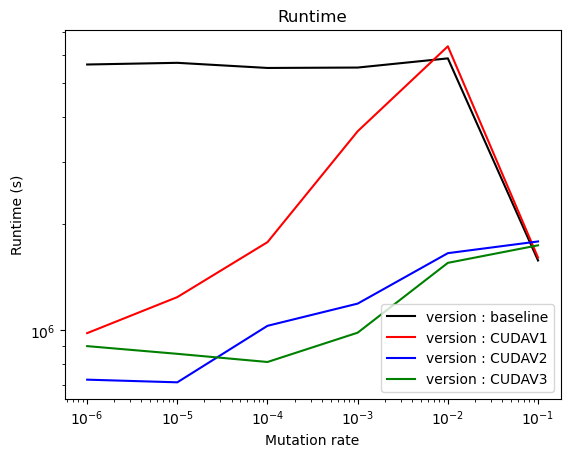

In [18]:
graph1_experiments = ["GPUGraph1", "GPUGraph2", "GPUGraph3", "GPUGraph4", "GPUGraph5"]
graph2_experiments = ["GPUGraphV21", "GPUGraphV22", "GPUGraphV23", "GPUGraphV24", "GPUGraphV25"]

dfGraph1 = dfExp[dfExp["versionExp"].isin(graph1_experiments)]
dfGraph2 = dfExp[dfExp["versionExp"].isin(graph2_experiments)]

graph_color = {"baseline" : "black", "CUDAV1" : "red", "CUDAV2" : "blue", "CUDAV3" : "green"}

for version in relevantCodeVersion:
    df_algo = dfGraph1[dfGraph1['versionCode'] == version]
    plt.plot(df_algo['mutation_rate'], df_algo['Duration'], color=graph_color[version], label="version : " + str(version))
plt.legend()
plt.title("Runtime")
plt.xlabel("Mutation rate")
plt.ylabel("Runtime (s)")
plt.yscale('log')
plt.xscale('log')
plt.show()

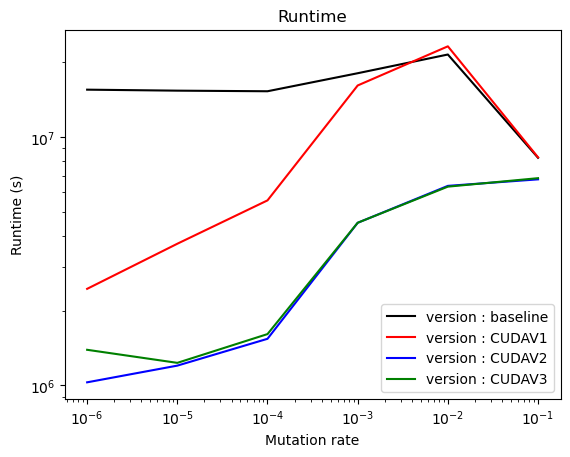

In [19]:
for version in relevantCodeVersion:
    df_algo = dfGraph2[dfGraph2['versionCode'] == version]
    plt.plot(df_algo['mutation_rate'], df_algo['Duration'], color=graph_color[version], label="version : " + str(version))
plt.legend()
plt.title("Runtime")
plt.xlabel("Mutation rate")
plt.ylabel("Runtime (s)")
plt.yscale('log')
plt.xscale('log')
plt.show()